In [1]:
import numpy as np
import random as rm
import pandas as pd
import sys
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
def getdata(fname):
    data = pd.read_csv(fname)
    xdata = data.drop("Class", axis=1)
    ydata = data['Class']
    return xdata, ydata

In [3]:
def shuffle(xdata, ydata):
    newX = np.copy(xdata)
    newY = np.copy(ydata)
    N = len(newX)
    shuff = np.random.permutation(N)
    for i in range(N):
        newX[i] = xdata[shuff[i]]
        newY[i] = ydata[shuff[i]]
    return (newX, newY)

In [4]:
xdata_train, ydata_train = getdata('Dry_Bean_train.csv')
xdata_test, ydata_test = getdata('Dry_Bean_test.csv')
# print(xdata_train)

## preprocessing
# Convert Class String labels into Integers
lab_enc = preprocessing.LabelEncoder()
ydata_train = lab_enc.fit_transform(ydata_train)
ydata_test = lab_enc.transform(ydata_test)

# Standarlize
scaler_train = preprocessing.StandardScaler().fit(xdata_train)
# scaler_test = preprocessing.StandardScaler().fit(xdata_test)

xdata_train_scaled = scaler_train.transform(xdata_train)
xdata_test_scaled = scaler_train.transform(xdata_test)

In [109]:
def perceptronLearning(data, label, w0, eta = 1, maxEpochs = 100):
    """
    data: (N, D + 1) data array, non-augmented format with labels(1.0, 2.0)
    eta: learning rate (constant)
    w0: 1 * 
    maxEpochs: max number of passes through the data.  Halts if reach the max epoch
    """
    
    N, D = data.shape
    wHat = np.copy(w0) # D + 1 * 1
#     print(wHat.shape)
#     print(zData)
#     wHats = np.zeros((maxIter + 1, D + 1))
    
    
    minJ = sys.float_info.max
    finalWHat = np.copy(w0)
    i1 = False
    
    
    for m in range(1, maxEpochs + 1):
        # 1. shuffle and preprocessing
        shuffledData, shuffledLabel = shuffle(data,label)
#         print(shuffledLabel)
#         break
        
        # 2. Augment and reflected
#         z = (-1.0) ** (shuffledLabel + 1)
        z = shuffledLabel
        dataAug = np.ones((N, D + 1))
        dataAug[:, 1:] = shuffledData
        zData = (dataAug.T * z).T            
        J_iter = 0
        correctClass = 0
        
#         for n in range(1, N + 1):
        for n in range(0, N):
            condition = np.dot(wHat ,zData[n])
#             print("condition", condition)
            index = (m - 1) * N + n
            
            # compute new J(w) and misclassfication
            J_iter = 0
            correctClass = 0
#             for i in range(0, N):
#                 gx = np.dot(wHat ,zData[i])
#                 if gx <= 0:
#                     J_iter -= gx
#                 else:
#                     correctClass += 1   
            gx_matrix = np.dot(wHat, zData.T)
#             print(J_iter.shape)
            gx_matrix = gx_matrix * -1
            loss = np.sum(gx_matrix > 0)
#             print("loss",loss)
    
        
            
            
            if(m == maxEpochs and N - n <= 100 and loss < minJ ):
                minJ = loss
                finalWHat = np.copy(wHat)
            
            if(condition <= 0):
                wHat = wHat + eta * zData[n]
        
        if minJ == 0:
            print("i1 reach. Data is linearly separable")
            i1 = True
            break
    if(not i1):
        print("i2 reach.")
    print("Weight matrix is:" , finalWHat)
    print("Min J is:" , minJ)
#     print("Misclassification rate is :", misEpoch[-1])

    return finalWHat

In [36]:
def change_label(ydata, c_num):
    N = len(ydata)
    changed_label = np.copy(ydata)
    for i in range(N):
        if(ydata[i] == c_num):
            changed_label[i] = 1
        else:
            changed_label[i] = -1
    return changed_label

In [101]:
def plot_hist(data, label, weight):
    """
    data : N * D non augment
    label : N * 1 label vector
    weight : 1 * D + 1 augment weight
    """
    N, D = data.shape
    data_aug = np.ones((N, D + 1))
    data_aug[:, 1:] = data
    class1 = []
    class2 = []
    for i in range(N):
        gx = weight @ data_aug[i]
#         print(gx)
        if(label[i] > 0):
            class1.append(gx)
        else:
#             print(gx)
            class2.append(gx)
    
    plt.hist(class1,bins = 100, alpha=0.3)
    plt.hist(class2,bins = 100, alpha = 0.3)
    plt.legend(('class k', 'class j != k'), loc=2)
    plt.show()
        
    

In [127]:
def main(xdata_train, ydata_train, xdata_test, ydata_test ):
    N, D = xdata_train.shape
    weights = np.zeros((7, D + 1))
    weight = np.ones(D + 1)
    for c in range(7):
        label_train = change_label(ydata_train, c)
        label_test = change_label(ydata_test, c)
        
        weights[c] = np.copy(perceptronLearning(xdata_train, label_train ,weight))
        
        print("Accuracy for training data is:", test(xdata_train, label_train, weights[c]), "%")
        print("Accuracy for testing data is:", test(xdata_test, label_test, weights[c]), "%")
        
        plot_hist(xdata_test, label_test, weights[c] )
        print("\n")
    return weights
        

In [117]:
def test(data, label, wHat):
    '''
    data: data is a matrix with dimension: num of data points * num features
    '''
    N, D = data.shape
    z = label
    wHat = np.copy(wHat)
    dataAug = np.ones((N, D + 1))
    dataAug[:, 1:] = data
    zData = (dataAug.T * z).T

    count = 0
    for i in range(N):
        if np.dot(wHat ,zData[i]) > 0:
            count += 1
#     print("Accuracy rate: ", (count) / N * 100 , "%")    
    return (count) / N * 100 

i2 reach.
Weight matrix is: [-36.         -28.60087316  54.73154488 -28.1266936  -14.98698367
 -49.62951441 -21.90425284 -15.73967196 -21.68719729   2.1055915
  -4.79083549  -1.15495649  -8.08200612 -21.48593591 -72.43551164
 -22.73420473  13.20265585]
Min J is: 186
Accuracy for training data is: 98.48150869458732 %
Accuracy for testing data is: 98.09104258443465 %


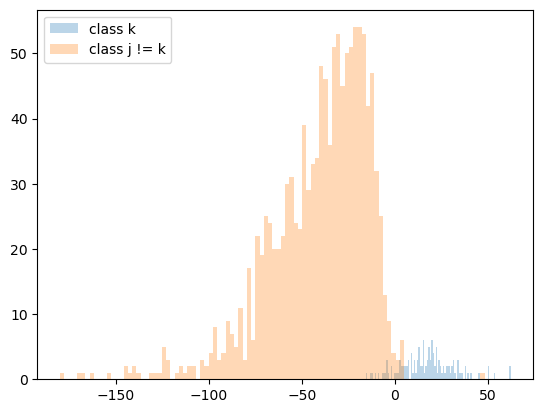



i1 reach. Data is linearly separable
Weight matrix is: [-28.           8.44727203   1.66088407   0.81776488   3.3682316
  -2.63667497   2.79285994   8.45797429   2.22162419   1.74867361
   2.05566716   4.02851812   2.87062772   8.63314079   4.27164211
   2.15745894   2.73616084]
Min J is: 0
Accuracy for training data is: 100.0 %
Accuracy for testing data is: 99.92657856093979 %


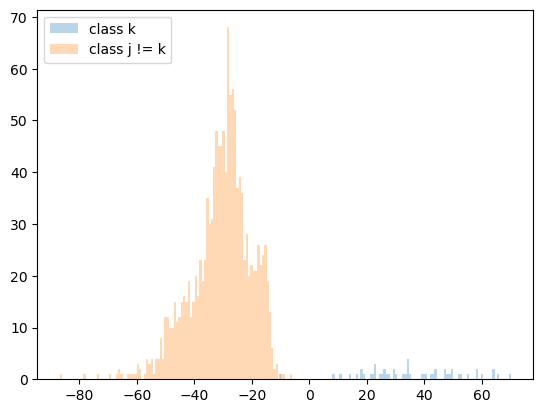



i2 reach.
Weight matrix is: [ -49.          -30.65660599  -31.85917368   69.815186    -77.37273476
  -67.3783354    28.80888287   -9.09333362   -4.83854503    0.81856057
   -3.2413633    13.70298145  -35.74025225 -140.06376002   68.47276459
  -65.31643919   -3.88222522]
Min J is: 285
Accuracy for training data is: 97.67327945138379 %
Accuracy for testing data is: 98.16446402349486 %


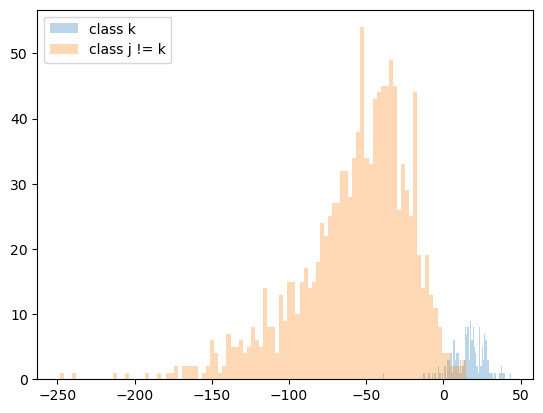



i2 reach.
Weight matrix is: [-1.60000000e+01 -4.95161341e+00  1.92317028e+01 -7.08014034e+00
  1.12832912e+01  2.45856703e-02  5.87694159e+01 -1.30612487e+01
  3.73229927e+00 -2.81903386e+00  1.86703210e+00  6.00631650e+00
  2.25374026e+01  1.18678333e+01  2.64575279e+01  1.10847086e+01
  1.31197165e+00]
Min J is: 592
Accuracy for training data is: 95.16695240427791 %
Accuracy for testing data is: 94.27312775330397 %


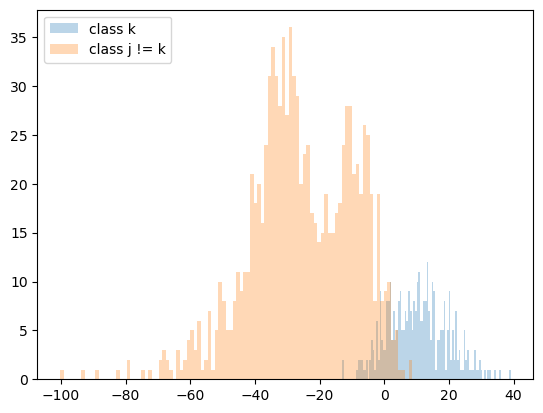



i2 reach.
Weight matrix is: [-36.         -45.50515993   9.49695167   1.83255746 -10.75525762
  69.73096833   9.81141473 -47.66518436 -12.75444641   0.64219741
   3.69507221  -3.18176461  11.31827127 -48.10524125   0.85186481
  27.54056961  -6.12319121]
Min J is: 220
Accuracy for training data is: 98.20393501510327 %
Accuracy for testing data is: 98.38472834067548 %


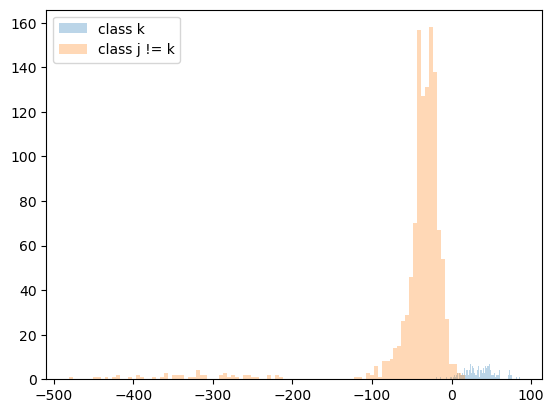



i2 reach.
Weight matrix is: [ -34.          -29.33074247  -26.20480651   16.98748079  -49.9632721
   -6.51176292  -22.29610256  -35.63303252   -5.39689601   -2.64479815
   -0.52265602    1.0786598   -26.26811941 -103.93958625   26.43716586
  -27.07839638   -0.18875012]
Min J is: 265
Accuracy for training data is: 97.83655808637441 %
Accuracy for testing data is: 97.79735682819384 %


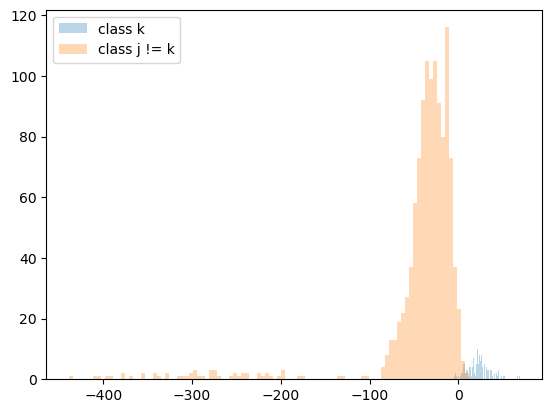



i2 reach.
Weight matrix is: [ -28.           11.56025143 -180.07677194   13.84223432   -4.35203167
  -39.61881869  -14.80187212  -15.87783617   27.98203347    1.05487084
    0.46028178  -25.72585778  -23.09950017  -87.93645621  -11.45523474
  -58.81522415    0.2653616 ]
Min J is: 752
Accuracy for training data is: 93.86072332435302 %
Accuracy for testing data is: 93.3186490455213 %


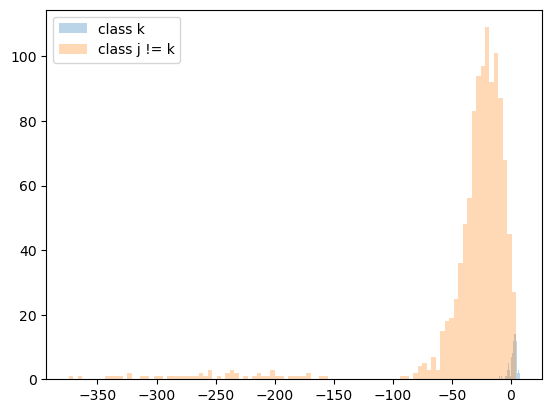

In [128]:
weights = main(xdata_train_scaled, ydata_train, xdata_test_scaled, ydata_test)

In [119]:
def decision_rule_1(xdata, ydata, weights):
    """
    weights : C * D + 1 augment weights matrix
    xdata : N * D non-augment data matrix
    ydata : N * 1 label vector
    """
    N , D = xdata.shape
    C = 7
    mis = 0
    unclassify = 0
    correct = 0
    
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:, 1:] = xdata
    
    for i in range(N):
        gx = weights @ xdata_aug[i]
#         print(gx)
        target = ydata[i]
#         print(target)
        
        filter_bool = gx > 0
        filter_gx = gx[filter_bool]
        l_fil = len(filter_gx)
        if(l_fil > 1 or l_fil == 0):
            unclassify += 1
        else:
            if(target != np.where(gx == filter_gx[0])[0][0]):
                mis += 1
            else:
                correct += 1
                
    print("The accuracy rate is :", correct / N * 100, "%")
    print("The error rate is :", mis / N * 100, "%")
    print("The unclassified rate is :", unclassify / N * 100, "%")

In [129]:
print("Classify the training data using decision rule 1:")
decision_rule_1(xdata_train_scaled, ydata_train, weights)
print("\n")
print("Classify the testing data using decision rule 1:")
decision_rule_1(xdata_test_scaled, ydata_test, weights)

Classify the training data using decision rule 1:
The accuracy rate is : 86.71728304351376 %
The error rate is : 5.208588456200506 %
The unclassified rate is : 8.074128500285738 %


Classify the testing data using decision rule 1:
The accuracy rate is : 86.04992657856094 %
The error rate is : 6.093979441997063 %
The unclassified rate is : 7.856093979441997 %


In [121]:
def decision_rule_2(xdata, ydata, weights):
    """
    weights : C * D + 1 augment weights matrix
    xdata : N * D non-augment data matrix
    ydata : N * 1 label vector
    """
    N , D = xdata.shape
    C = 7
    mis = 0
    unclassify = 0
    correct = 0
    
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:, 1:] = xdata
    
    for i in range(N):
        gx = weights @ xdata_aug[i]
#         print(gx)
        target = ydata[i]
#         print(target)
        
        if( np.argmax(gx) != target ):
            mis += 1
        else:
            correct += 1
            
    print("The accuracy rate is :", correct / N * 100, "%")
    print("The error rate is :", mis / N * 100, "%")
    print("The unclassified rate is :", unclassify / N * 100, "%")
  

In [130]:
print("Classify the training data using decision rule 2:")
decision_rule_2(xdata_train_scaled, ydata_train, weights)
print("\n")
print("Classify the testing data using decision rule 2:")
decision_rule_2(xdata_test_scaled, ydata_test, weights)

Classify the training data using decision rule 2:
The accuracy rate is : 91.26459302800228 %
The error rate is : 8.735406971997714 %
The unclassified rate is : 0.0 %


Classify the testing data using decision rule 2:
The accuracy rate is : 90.30837004405286 %
The error rate is : 9.691629955947137 %
The unclassified rate is : 0.0 %


In [123]:
def decision_rule_3(xdata, ydata, weights):
    """
    weights : C * D + 1 augment weights matrix
    xdata : N * D non-augment data matrix
    ydata : N * 1 label vector
    """
    N , D = xdata.shape
    C = 7
    mis = 0
    unclassify = 0
    correct = 0
    
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:, 1:] = xdata
    
    for i in range(N):
        gx = weights @ xdata_aug[i] # C * 1 vector
        
        weights_nonaug = weights[:,1:] # C * D
        weight_norm = np.linalg.norm(weights_nonaug, axis = 1)
        
        gkx = gx / weight_norm
        
        target = ydata[i]
#         print(target)
        
        if( np.argmax(gkx) != target ):
            mis += 1
        else:
            correct += 1
            
    print("The accuracy rate is :", correct / N * 100, "%")
    print("The error rate is :", mis / N * 100, "%")
    print("The unclassified rate is :", unclassify / N * 100, "%")


In [131]:
print("Classify the training data using decision rule 3:")
decision_rule_3(xdata_train_scaled, ydata_train, weights)
print("\n")
print("Classify the testing data using decision rule 3:")
decision_rule_3(xdata_test_scaled, ydata_test, weights)

Classify the training data using decision rule 3:
The accuracy rate is : 91.11764225651073 %
The error rate is : 8.882357743489266 %
The unclassified rate is : 0.0 %


Classify the testing data using decision rule 3:
The accuracy rate is : 90.08810572687224 %
The error rate is : 9.911894273127754 %
The unclassified rate is : 0.0 %
